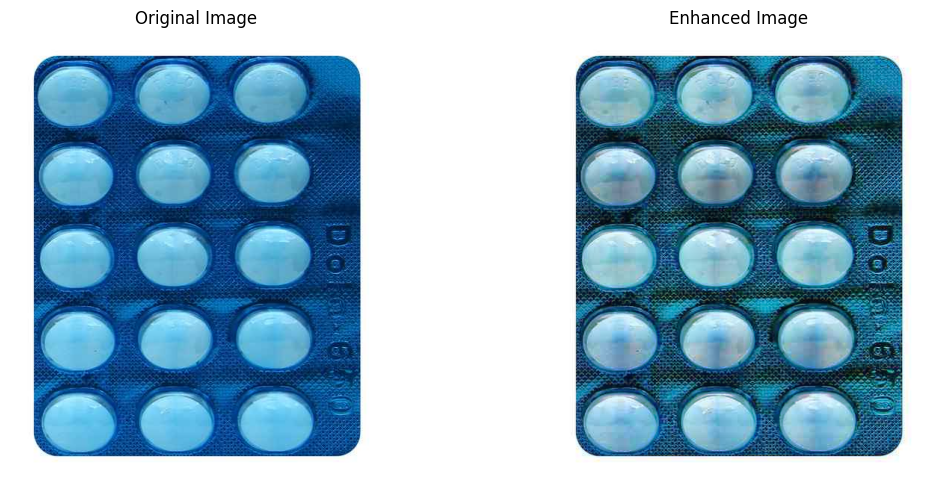

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the color image (replace 'tablet_image.jpg' with your image file path)
image = cv2.imread('1.jpg')

# Split the image into color channels (BGR)
b, g, r = cv2.split(image)

# Apply CLAHE to each color channel
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_b = clahe.apply(b)
enhanced_g = clahe.apply(g)
enhanced_r = clahe.apply(r)

# Merge the enhanced color channels back into a color image
enhanced_image = cv2.merge((enhanced_b, enhanced_g, enhanced_r))

# Create a figure with two subplots for original and enhanced images
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original Image
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

# Enhanced Image
axes[1].imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Enhanced Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()


In [30]:
!pip install opencv-python

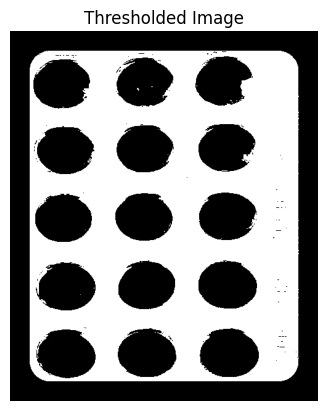

In [31]:
# Python program to transform an image using
# threshold.
from google.colab.patches import cv2_imshow
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 0, 255,
                            cv2.THRESH_BINARY_INV +
                            cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

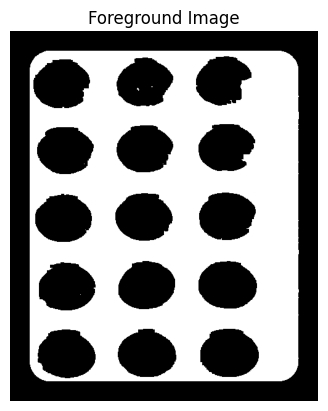

In [32]:
# Noise removal using Morphological
# closing operation
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE,
                            kernel, iterations = 2)

# Background area using Dilation
bg = cv2.dilate(closing, kernel, iterations = 1)

# Finding foreground area
dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 0)
ret, fg = cv2.threshold(dist_transform, 0.02
                        * dist_transform.max(), 255, 0)

plt.imshow(fg, cmap='gray')
plt.title('Foreground Image')
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

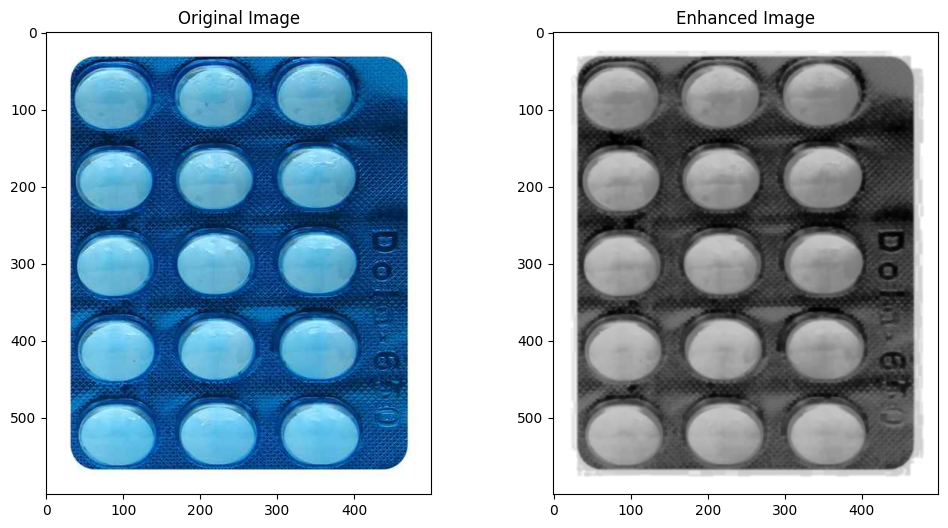

In [35]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Histogram Equalization to improve contrast
equalized = cv2.equalizeHist(gray)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(equalized, (5, 5), 0)

# Apply Morphological operations to further enhance features (optional)
kernel = np.ones((3, 3), np.uint8)
morphology = cv2.morphologyEx(blurred, cv2.MORPH_CLOSE, kernel, iterations=1)

# Display the original and enhanced images using Matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(morphology, cmap='gray')
plt.title('Enhanced Image')

plt.show()


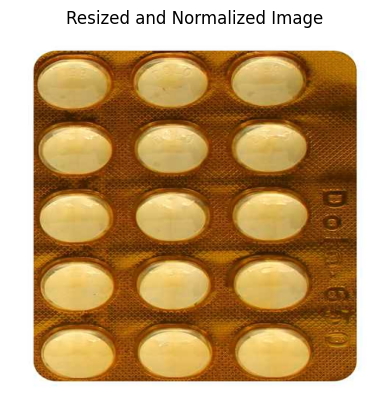

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('1.jpg')

# Define the desired dimensions for input to the CNN
target_size = (500,500)  # Adjust this as needed

# Resize the image
resized_image = cv2.resize(image, target_size)

# Normalize the pixel values to the range [0, 1]
normalized_image = resized_image.astype(np.float32) / 255.0

# If working with a model that expects input in the range [-1, 1], you can use the following:
# normalized_image = (normalized_image - 0.5) / 0.5

# Display the resized and normalized image using Matplotlib
plt.imshow(normalized_image)
plt.title('Resized and Normalized Image')
plt.axis('off')  # Optional: Turn off axis labels
plt.show()


In [37]:
pip install pillow


<ipython-input-38-b4e98eb9f369>:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = image.resize(target_size, Image.ANTIALIAS)


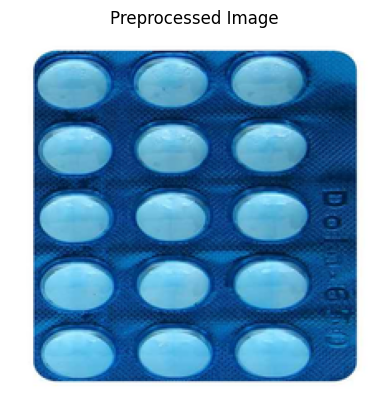

In [38]:
from PIL import Image
import numpy as np

# Load the image using Pillow
image = Image.open('1.jpg')

# Resize the image to a specific size
target_size = (224, 224)  # Adjust this as needed
resized_image = image.resize(target_size, Image.ANTIALIAS)

# Convert the resized image to a NumPy array
image_array = np.array(resized_image)

# Normalize the pixel values to the range [0, 1]
normalized_image = image_array.astype(np.float32) / 255.0

# If working with a model that expects input in the range [-1, 1], you can use the following:
# normalized_image = (normalized_image - 0.5) / 0.5

# Now, 'normalized_image' is ready to be used as input for feature extraction

# You can save the preprocessed image if needed
resized_image.save('preprocessed_image.jpg')

# To display the image using Matplotlib (optional)
import matplotlib.pyplot as plt
plt.imshow(normalized_image)
plt.title('Preprocessed Image')
plt.axis('off')  # Optional: Turn off axis labels
plt.show()


In [39]:
from PIL import Image, ImageEnhance, ImageFilter

# Load the image
image = Image.open('1.jpg')

# Convert the image to grayscale (optional)
grayscale_image = image.convert('L')

# Apply image enhancement (brightness, contrast, etc.)
enhancer = ImageEnhance.Contrast(grayscale_image)
enhanced_image = enhancer.enhance(2.0)  # Adjust the enhancement factor as needed

# Apply image filtering (e.g., Gaussian blur)
blurred_image = enhanced_image.filter(ImageFilter.GaussianBlur(radius=5))

# Save the preprocessed image (optional)
blurred_image.save('preprocessed_image.jpg')

# You can now work with the 'blurred_image' for pill extraction

# To display the preprocessed image
blurred_image.show()
